In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import rasterio

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('D:/Jintu/Jintu_GEDI/AGBD/Study Area/Shapefile/Multi_Points/AGBD.csv', sep=',', index_col=0)

In [5]:
df

,Latitude,Pixel_Valu,TIRS,SWIR,RED,NIR,NDWI,NDVI,EVI,DISS,CORR,CONT,BLUE,Elevation,Slope,Aspect
Longitude,,,,,,,,,,,,,,,,
92.436847,26.682730,18.254978,293.188,0.275748,0.123868,0.210794,-0.133502,0.259744,0.234325,90.416667,-0.500455,12644.541670,0.136879,77,1.39176,48.2190
92.780182,26.644582,11.058234,292.928,0.141160,0.068373,0.166020,0.080929,0.416596,0.344200,371.895833,-0.488397,180179.520800,0.115603,80,4.74128,12.6129
92.379625,26.692267,30.942114,292.995,0.293937,0.134854,0.262904,-0.055731,0.321929,0.315527,76.562500,-0.484939,8276.770833,0.140994,87,1.39182,131.7790
92.112587,26.816249,39.554382,292.121,0.167547,0.067178,0.228983,0.154934,0.546341,0.502279,458.770833,-0.467419,267578.270800,0.110226,149,3.11470,90.0000
92.293791,26.778100,19.761189,291.625,0.049189,0.081085,0.130639,0.452935,0.234049,0.168965,702.458333,-0.462819,635205.250000,0.117860,109,0.92741,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92.541755,26.711341,64.932630,292.189,0.126689,0.090312,0.166219,0.134957,0.295899,0.241955,327.541667,0.379866,159596.875000,0.123171,75,5.86951,61.8101
92.331940,26.892545,19.827782,293.144,0.205517,0.102493,0.252980,0.103518,0.423343,0.399733,126.375000,0.385051,22933.583330,0.123569,176,3.62483,120.7340
92.217495,26.711341,25.674833,292.520,0.226925,0.115437,0.257925,0.063938,0.381634,0.363224,300.166667,0.390429,123317.291700,0.129311,95,4.83271,40.0168


In [7]:
# Specify the dependent variable and independent variables
dependent_variable = 'Pixel_Valu'
independent_variables = ['TIRS', 'SWIR', 'RED', 'NIR', 'NDWI', 'NDVI', 'EVI', 'DISS', 'CORR', 'CONT', 'BLUE', 'Elevation', 'Slope', 'Aspect']

In [8]:
# Extract features (independent variables) and target (dependent variable)
X = df[independent_variables]
y = df[dependent_variable]

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize the Multiple Linear Regression model
model = LinearRegression()

In [11]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error: 2388.9919239008846
R-squared: 0.8179518079733861


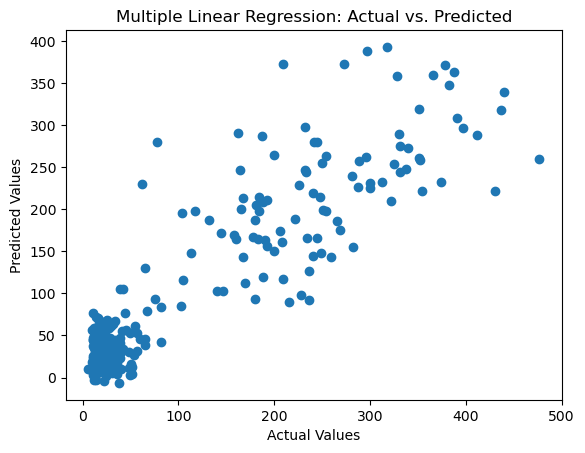

In [13]:
# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize predictions vs. actual values (for simplicity, you may want to choose only a subset of data)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression: Actual vs. Predicted')
plt.show()

In [15]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the equation
equation = f'Y = {intercept:.4f} + '
for i in range(len(independent_variables)):
    equation += f'({coefficients[i]:.4f} * {independent_variables[i]}) + '

equation = equation[:-2]  # Remove the trailing "+ "
print(f'Equation: {equation}')

Equation: Y = 2425.4503 + (-7.9014 * TIRS) + (345.9712 * SWIR) + (406.4555 * RED) + (-218.1885 * NIR) + (178.7382 * NDWI) + (-14.5161 * NDVI) + (24.6939 * EVI) + (0.0172 * DISS) + (-0.5089 * CORR) + (0.0000 * CONT) + (-1424.8781 * BLUE) + (0.0254 * Elevation) + (4.2621 * Slope) + (-0.0168 * Aspect) 


Mean Squared Error: 2388.9919239008846
R-squared: 0.8179518079733861


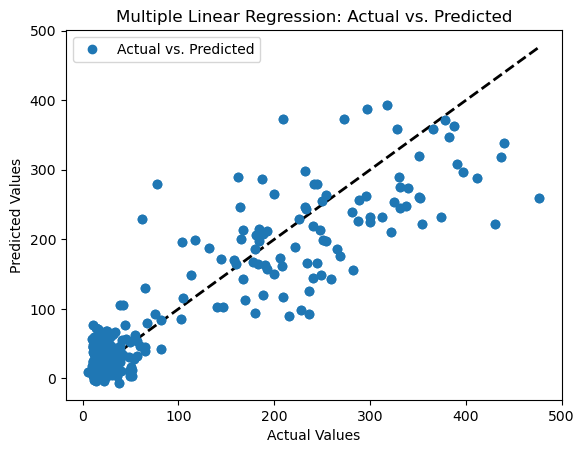

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize predictions vs. actual values along with the regression line
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', linewidth=2)  # Diagonal line for reference
plt.plot(y_test, y_pred, 'o', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

Variable Ranking:
     Variable  Absolute Coefficient
10       BLUE           1424.878077
2         RED            406.455506
1        SWIR            345.971184
3         NIR            218.188492
4        NDWI            178.738195
6         EVI             24.693904
5        NDVI             14.516113
0        TIRS              7.901407
12      Slope              4.262064
8        CORR              0.508908
11  Elevation              0.025437
7        DISS              0.017195
13     Aspect              0.016804
9        CONT              0.000020


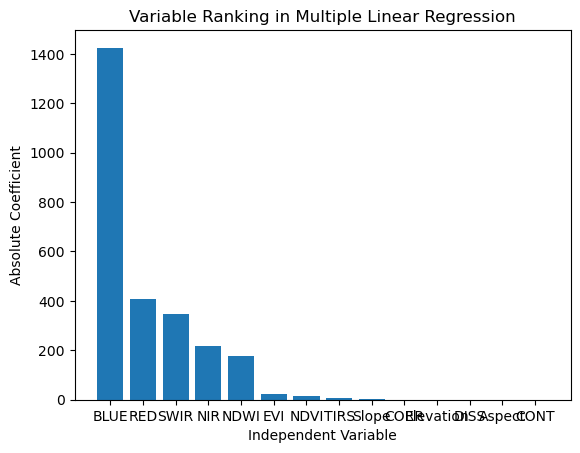

In [18]:
# Rank the variables based on the absolute values of coefficients
variable_ranking = pd.DataFrame({'Variable': independent_variables, 'Coefficient': coefficients})
variable_ranking['Absolute Coefficient'] = variable_ranking['Coefficient'].abs()
variable_ranking = variable_ranking.sort_values(by='Absolute Coefficient', ascending=False)

# Print the variable ranking
print("Variable Ranking:")
print(variable_ranking[['Variable', 'Absolute Coefficient']])

# Visualize the variable ranking
plt.bar(variable_ranking['Variable'], variable_ranking['Absolute Coefficient'])
plt.xlabel('Independent Variable')
plt.ylabel('Absolute Coefficient')
plt.title('Variable Ranking in Multiple Linear Regression')
plt.show()